In [1]:
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import mpld3
from mpld3 import plugins

## Result Presentation
- graph all places using their cost and location
- data from hse_data_processing.ipynb file

In [14]:
private_nh = pd.read_csv('./processed_data_from_api/private_homes.csv')
public_nh = pd.read_csv('./processed_data_from_api/public_homes.csv')

In [15]:
renamed_columns = ['Name', 'Eircode', 'Latitude', 'Longitude', 'County', 'Cost of Care']
# tidy private data
private_nh = private_nh[['Centre_Title_x', 'Eircode', 'Latitude', 'Longitude', 'County_x', 'Cost of Care']]
private_nh = private_nh.set_axis(renamed_columns, axis=1)
# tidy public data
public_nh = public_nh[['Centre_Title_x', 'Eircode', 'Latitude', 'Longitude', 'County_x', 'Cost of Care']]
public_nh = public_nh.set_axis(renamed_columns, axis=1)



In [16]:
# get miniumum and maximum costs of care
min_cost_public = public_nh['Cost of Care'].min()
max_cost_public = public_nh['Cost of Care'].max()

min_cost_private = private_nh['Cost of Care'].min()
max_cost_private = private_nh['Cost of Care'].max()

min_cost = min(min_cost_private, min_cost_public)
max_cost = max(max_cost_private, max_cost_public)

print(min_cost_private, min_cost_public)

print(max_cost_private, max_cost_public)

print(min_cost, max_cost)

993 326
1440 2991
326 2991



Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8888/    [Ctrl-C to exit]


127.0.0.1 - - [21/May/2024 14:52:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2024 14:52:15] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2024 14:52:15] "GET /mpld3.js HTTP/1.1" 200 -
127.0.0.1 - - [21/May/2024 14:52:15] code 404, message Not Found
127.0.0.1 - - [21/May/2024 14:52:15] "GET /favicon.ico HTTP/1.1" 404 -



stopping Server...


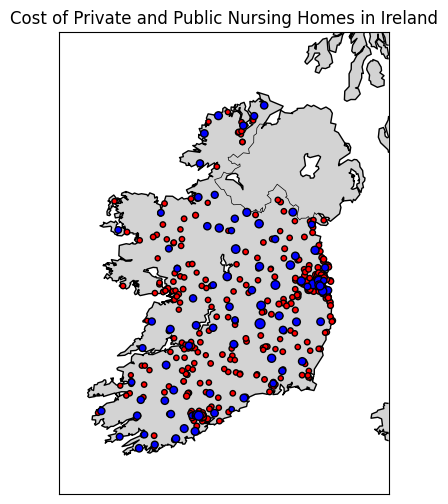

In [17]:
# create map of Ireland
fig, ax = plt.subplots(figsize=(8, 6))
basemap = Basemap(projection='merc', llcrnrlat=51, urcrnrlat=56, llcrnrlon=-11, urcrnrlon=-5, resolution='i', ax=ax)

# draw map features
basemap.drawcoastlines()
basemap.drawcountries()
basemap.fillcontinents(color='lightgray', zorder=0)

# min-max normalization of cost of care sizes
public_sizes = ((public_nh['Cost of Care'] - min_cost) / (max_cost - min_cost)) * 50
private_sizes = ((private_nh['Cost of Care'] - min_cost) / (max_cost - min_cost)) * 50

# convert coordinates to geographic latitude and longitude coordinates
home_lon, home_lat = private_nh['Longitude'], private_nh['Latitude']

# plot map points
home_x, home_y = basemap(home_lon, home_lat)
home_scatter_private = basemap.scatter(home_x, home_y, marker='o', color='red', edgecolors='black', s=private_sizes, zorder=3, label='Private Nursing Homes')


# convert coordinates to geographic latitude and longitude coordinates
home_lon, home_lat = public_nh['Longitude'], public_nh['Latitude']

# plot map points
home_x, home_y = basemap(home_lon, home_lat)
home_scatter_public = basemap.scatter(home_x, home_y, marker='o', color='blue', edgecolors='black', s=public_sizes, zorder=3, label='Public Nursing Homes')

# hover functionality - private
home_labels_private = []
for i in range(len(private_nh['Cost of Care'])):
    label = f'<div style="background-color: white; color: black; border: 3px solid red; padding: 5px;"><p>{private_nh['Name'][i]}</p><p>Private</p><p>Cost of Care (per week): €{private_nh['Cost of Care'][i]}</p></div>'
    home_labels_private.append(label)


tooltip_home = plugins.PointHTMLTooltip(home_scatter_private, labels=home_labels_private)
plugins.connect(fig, tooltip_home)

# hover functionality - public
home_labels_public = []
for i in range(len(public_nh['Cost of Care'])):
    label = f'<div style="background-color: white; color: black; border: 3px solid blue; padding: 5px;"><p>{public_nh['Name'][i]}</p><p>Public</p><p>Cost of Care (per week): €{public_nh['Cost of Care'][i]}</p></div>'
    home_labels_public.append(label)


tooltip_home = plugins.PointHTMLTooltip(home_scatter_public, labels=home_labels_public)
plugins.connect(fig, tooltip_home)

# add interactive legend
interactive_legend = plugins.InteractiveLegendPlugin([home_scatter_public, home_scatter_private], ['Public Nursing Homes', 'Private Nursing Homes'], alpha_unsel=0.2, alpha_over=1.0, start_visible=True)
plugins.connect(fig, interactive_legend)

# add title
plt.title('Cost of Private and Public Nursing Homes in Ireland')
# plt.legend()
# # # save plot
# plt.savefig('../graphs/nursing_home_private_public_cost.png', bbox_inches='tight')
# show plot
# mpld3.display()
# for zooming
mpld3.show()

# # save plot as HTML file

# html_str = mpld3.fig_to_html(fig)
# with open("../html_pages/costPrivatePublicNursingHomes.html", "w") as f:
#     f.write(html_str)